In [24]:
import torch

In [25]:
print(torch.__version__)
print(torch.cuda.is_available())

1.9.1+cu111
True


## Pytorch Components

### 1. torch

- <span style = 'font-size:1.2em;line-height:1.5em'>메인 네임스페이스입니다. Tensor 생성, tensor간의 연산 등 다양한 함수가 정의되어 있습니다. Numpy와 유사한 구조를 가집니다.</span>

### 2. torch.autograd

- <span style = 'font-size:1.2em;line-height:1.5em'>자동 미분을 위한 함수들이 포함되어져 있습니다. 자동 미분의 on,off를 제어하는 콘텍스트 매니저(enable_grad/no_grad)나 자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 'Function' 등이 포함되어져 있습니다.</span>

### 3. torch.nn

- <span style = 'font-size:1.2em;line-height:1.5em'>신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의되어져 있습니다. 예를 들어 RNN, LSTM과 같은 레이어, ReLU와 같은 활성화 함수, MSELoss와 같은 손실 함수들이 있습니다.</span>

### 4. torch.optim

- <span style = 'font-size:1.2em;line-height:1.5em'>확률적 경사 하강법(Stochastic Gradient Descent, SGD)를 중심으로 한 파라미터 최적화 알고리즘이 구현되어져 있습니다.</span>


### 5. torch.utils.data
- <span style = 'font-size:1.2em;line-height:1.5em'>SGD의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수가 포함되어져 있습니다.</span>


In [43]:
# 빈 tensor 생성
tensor_empty = torch.empty(size=(3,2))
tensor_zero1 = torch.zeros(size=(3,2))
tensor_zero2 = torch.zeros_like(tensor_empty)

In [44]:
print(tensor_empty)

tensor([[8.1275e-44, 7.1466e-44],
        [7.1466e-44, 6.4460e-44],
        [7.0065e-44, 6.7262e-44]])


In [45]:
print(tensor_zero1)
print(tensor_zero2)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [46]:
# 값을 직접 전달하여 tensor 생성
tensor_cpu = torch.tensor([1,2,3,4])
tensor_gpu = torch.tensor([1,2,3,4], device='cuda:0') # gpu에 
tensor_flo = torch.tensor([1,2,3,4], dtype=torch.float64)
print(tensor_cpu)
print(tensor_gpu)
print(tensor_flo)

tensor([1, 2, 3, 4])
tensor([1, 2, 3, 4], device='cuda:0')
tensor([1., 2., 3., 4.], dtype=torch.float64)


In [49]:
# 텐서의 데이터타입 확인
print(tensor_cpu.dtype)
print(tensor_gpu.dtype)
print(tensor_flo.dtype)

torch.int64
torch.int64
torch.float64


In [50]:
# 어떤 장치에 tensor가 생성되었는지 확인
print(tensor_cpu.device)
print(tensor_gpu.device) # cuda:0 은 gpu사용
print(tensor_flo.device)

cpu
cuda:0
cpu


In [54]:
# tensor의 크기, 차원 확인
b = torch.randn(size=(3,3,3))
print(b.size())
print(b.dim())
print('-----------------------')
print(tensor_cpu.size())
print(tensor_cpu.dim())

torch.Size([3, 3, 3])
3
-----------------------
torch.Size([4])
1


In [57]:
print(b.shape)

torch.Size([3, 3, 3])


In [58]:
# 넘파이로 tensor 생성
import numpy as np

In [59]:
np_x = np.arange(32).reshape(4,4,2)

In [60]:
print(np_x)

[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]
  [12 13]
  [14 15]]

 [[16 17]
  [18 19]
  [20 21]
  [22 23]]

 [[24 25]
  [26 27]
  [28 29]
  [30 31]]]


In [61]:
torch_x = torch.tensor(np_x)

In [62]:
print(torch_x)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]],

        [[16, 17],
         [18, 19],
         [20, 21],
         [22, 23]],

        [[24, 25],
         [26, 27],
         [28, 29],
         [30, 31]]], dtype=torch.int32)


In [63]:
# 인덱싱
print(torch_x[0])
print(torch_x[1])
print(torch_x[1,0])
print(torch_x[1,0,0])

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7]], dtype=torch.int32)
tensor([[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]], dtype=torch.int32)
tensor([8, 9], dtype=torch.int32)
tensor(8, dtype=torch.int32)


In [64]:
#Broadcasting
a = torch.tensor([[1,1,1,1]])
b = torch.tensor([[2,2,2,2],[2,2,2,2],[2,2,2,2],[2,2,2,2]])

In [65]:
print(a+b)

tensor([[3, 3, 3, 3],
        [3, 3, 3, 3],
        [3, 3, 3, 3],
        [3, 3, 3, 3]])


In [67]:
# 행렬곱
# 1*2 + 1*2 + 1*2 + 1*2 = 8
torch.matmul(a,b)

tensor([[8, 8, 8, 8]])


In [68]:
# 원소간의 곱
torch.mul(a, b)

tensor([[2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2]])

In [76]:
a = torch.randn(size=(3,4,5))
a

tensor([[[ 1.2560, -0.0742, -0.2358,  0.2535,  0.0303],
         [-0.9521,  0.4020,  0.7963, -0.4301, -1.3356],
         [ 1.7780,  0.5246,  0.5085, -1.4925,  0.9328],
         [ 0.7558,  1.7817,  0.6535, -1.1937, -0.5990]],

        [[-0.0928, -0.9312, -1.1898,  0.1251, -2.5063],
         [ 0.0795, -0.2920,  0.7914,  0.6898, -0.8566],
         [-0.4063, -0.4750, -0.1594,  1.0569,  1.1128],
         [ 1.6156,  0.9174, -1.9552,  0.7756,  0.3969]],

        [[ 0.9211,  1.5317, -1.0019,  3.3254,  0.9527],
         [ 0.9054, -0.2068,  0.0715, -0.2406,  1.1702],
         [ 0.3547, -1.0501,  0.1145,  0.3176,  0.4581],
         [ 0.4895, -0.3044, -0.1503,  0.1363, -0.0607]]])

In [77]:
# (1.260-0.0928+0.9211)/3
torch.mean(a, dim=0)

tensor([[ 0.6948,  0.1754, -0.8092,  1.2347, -0.5077],
        [ 0.0109, -0.0323,  0.5531,  0.0064, -0.3407],
        [ 0.5754, -0.3335,  0.1545, -0.0393,  0.8346],
        [ 0.9536,  0.7982, -0.4840, -0.0940, -0.0876]])

In [78]:
#(1.2560-0.9521+ 1.7780+ 0.7558)/4
torch.mean(a, dim=1)

tensor([[ 0.7094,  0.6585,  0.4306, -0.7157, -0.2429],
        [ 0.2990, -0.1952, -0.6282,  0.6618, -0.4633],
        [ 0.6677, -0.0074, -0.2415,  0.8847,  0.6301]])

In [79]:
#1.2560, -0.0742, -0.2358,  0.2535,  0.0303의 평균
torch.mean(a, dim=2)

tensor([[ 0.2460, -0.3039,  0.4503,  0.2797],
        [-0.9190,  0.0824,  0.2258,  0.3501],
        [ 1.1458,  0.3399,  0.0390,  0.0221]])

In [82]:
a=torch.tensor(np.arange(32).reshape(4,4,2))
a

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]],

        [[16, 17],
         [18, 19],
         [20, 21],
         [22, 23]],

        [[24, 25],
         [26, 27],
         [28, 29],
         [30, 31]]], dtype=torch.int32)

In [85]:
print(torch.max(a))
print(torch.max(a, dim=0)) #인덱스 값도 추출된다.

tensor(31, dtype=torch.int32)
torch.return_types.max(
values=tensor([[24, 25],
        [26, 27],
        [28, 29],
        [30, 31]], dtype=torch.int32),
indices=tensor([[3, 3],
        [3, 3],
        [3, 3],
        [3, 3]]))


In [88]:
#모양 변경
torch.reshape(a, (8,4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]], dtype=torch.int32)

In [89]:
a.view(8,4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]], dtype=torch.int32)

In [90]:
a = torch.tensor(np.arange(32).reshape(4,4,1,1,2))
a

tensor([[[[[ 0,  1]]],


         [[[ 2,  3]]],


         [[[ 4,  5]]],


         [[[ 6,  7]]]],



        [[[[ 8,  9]]],


         [[[10, 11]]],


         [[[12, 13]]],


         [[[14, 15]]]],



        [[[[16, 17]]],


         [[[18, 19]]],


         [[[20, 21]]],


         [[[22, 23]]]],



        [[[[24, 25]]],


         [[[26, 27]]],


         [[[28, 29]]],


         [[[30, 31]]]]], dtype=torch.int32)

In [91]:
# 크기가 1인 차원을 제거
a.squeeze().size()

torch.Size([4, 4, 2])

In [92]:
a = torch.tensor(np.arange(32).reshape(8,4))
print(a)
print(a.size()) # shape을 써도 된다

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]], dtype=torch.int32)
torch.Size([8, 4])


In [93]:
b = torch.unsqueeze(a, dim=0)
print(b.size())
c = torch.unsqueeze(a, dim=1)
print(c.size())
d = torch.unsqueeze(a, dim=2)
print(d.size())

torch.Size([1, 8, 4])
torch.Size([8, 1, 4])
torch.Size([8, 4, 1])


In [99]:
a = torch.tensor(np.arange(16).reshape(2,2,4))
b = torch.tensor(np.arange(16,32).reshape(2,2,4))
print(a)
print('-------------------------------------------------')
print(b)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]], dtype=torch.int32)
-------------------------------------------------
tensor([[[16, 17, 18, 19],
         [20, 21, 22, 23]],

        [[24, 25, 26, 27],
         [28, 29, 30, 31]]], dtype=torch.int32)


In [104]:
# cat() 두 tensor를 연결해준다.
c = torch.cat((a,b), dim=0)
print(c)
print(c.size())

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23]],

        [[24, 25, 26, 27],
         [28, 29, 30, 31]]], dtype=torch.int32)
torch.Size([4, 2, 4])


In [103]:
d = torch.cat((a,b), dim=1)
print(d)
print(d.size())

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [16, 17, 18, 19],
         [20, 21, 22, 23]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [24, 25, 26, 27],
         [28, 29, 30, 31]]], dtype=torch.int32)
torch.Size([2, 4, 4])


In [105]:
e = torch.cat((a,b), dim=2)
print(e)
print(e.size())

tensor([[[ 0,  1,  2,  3, 16, 17, 18, 19],
         [ 4,  5,  6,  7, 20, 21, 22, 23]],

        [[ 8,  9, 10, 11, 24, 25, 26, 27],
         [12, 13, 14, 15, 28, 29, 30, 31]]], dtype=torch.int32)
torch.Size([2, 2, 8])


---

In [1]:
pip install matplotlib

     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     -------------------------------------  153.6/155.5 kB 3.1 MB/s eta 0:00:01
     -------------------------------------- 155.5/155.5 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.5 MB 3.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.4/7.5 MB 4.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.5 MB 6.0 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/7.5 MB 8.5 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/7.5 MB 7.6 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/7.5 MB 7.7 MB/s eta 0:00:01
   --------------- ------------------------ 2.9/7.5 MB 9.4 MB/s eta 0:00:01
   ------------------- -------------------- 3.6/7.5 MB 9.6 MB/s eta 0:00:01
   ----------------------- ---------------- 4.4/7.5 MB 10.9 MB/s eta 0:00:01
   ----------

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import numpy as np

In [4]:
# mnist.py에서 우리가 실제로 사용할 load_mnist함수만 불러올게요
from mnist import load_mnist

In [5]:
(x_trn, y_trn), (x_tst, y_tst) = load_mnist(flatten=True, normalize=False)

In [6]:
x_trn

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
y_trn

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
print(x_trn.shape, y_trn.shape)

(60000, 784) (60000,)


In [10]:
print(x_tst.shape, y_tst.shape)

(10000, 784) (10000,)


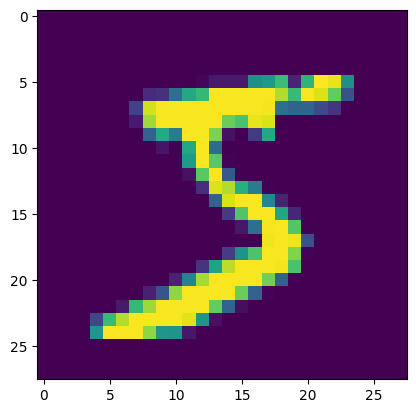

In [12]:
plt.imshow(x_trn[0].reshape(-1,28)) # mnist데이터셋은 28*28픽셀이기 때문에 28*28로 구성된다.
## plt.imshow(x_trn[0].reshape(28,-1))

In [15]:
np.argwhere(y_tst==1).reshape(-1)

array([   2,    5,   14, ..., 9978, 9984, 9994], dtype=int64)

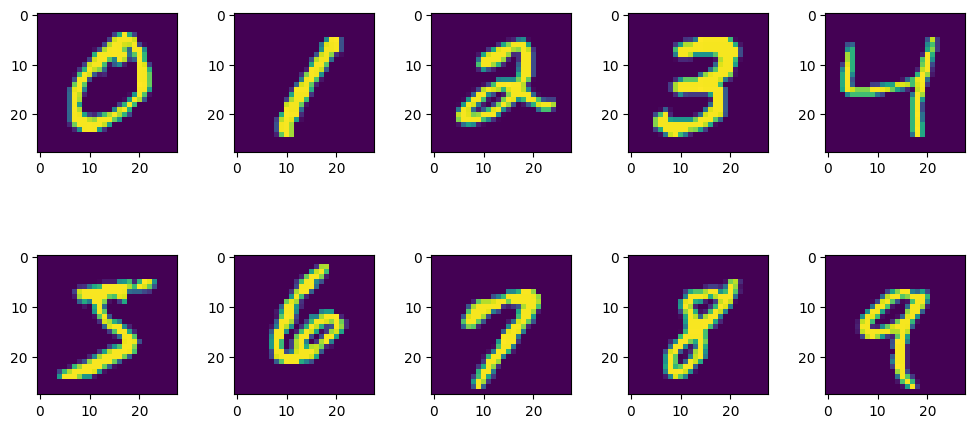

In [22]:
n_rows=2 # 2x5 크기의 그리드를 생성
n_cols=5 
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,5))
plt.tight_layout() # 겹치지 않게함

for i in range(0,10): # 0~9 반복
    row_num = int(i/n_cols)
    col_num = int(i%n_cols) # 현재 숫자 i에 대한 그리드 내의 행과 열의 위치를 계산
    
    idxs = np.argwhere(y_trn==i).reshape(-1) # 숫자 i에 해당하는 모든 이미지의 인덱스 찾기
    
    idx = idxs[0] # 첫 번째 이미지 인덱스 선택
    
    ax[row_num, col_num].imshow(x_trn[idx].reshape(-1,28)) # 선택한 이미지를 해당 위치의 서브플롯에 시각화

---

In [25]:
import numpy
import pickle
# pkl확장자의 파일은 다음과 같은 방식으로 열 수 있습니다!

with open("sample_weights/sample_weight.pkl","rb") as f: #경로의 파일을 바이너리 읽기 모드("rb")로 엽니다. f에 할당
    network = pickle.load(f)

In [26]:
network

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
        -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
         0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
         0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
        -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
        -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
         0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
        -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
         0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
        -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
        -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
         0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
         0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
         0.02454282,  0.05875788,  0.08505439

In [27]:
type(network)

dict

In [28]:
# dictionary에 뭐가 들어있는지 볼까요?
for key, value in network.items():
    print(f"{key}'s shape: {value.shape}, type: {type(value)}")
    #f-string을 사용하면 문자열 내부에 중괄호 {}를 사용하여 변수나 표현식을 직접 삽입할 수 있습니다.

b2's shape: (100,), type: <class 'numpy.ndarray'>
W1's shape: (784, 50), type: <class 'numpy.ndarray'>
b1's shape: (50,), type: <class 'numpy.ndarray'>
W2's shape: (50, 100), type: <class 'numpy.ndarray'>
W3's shape: (100, 10), type: <class 'numpy.ndarray'>
b3's shape: (10,), type: <class 'numpy.ndarray'>


w1: 784, 50
w2: 50, 100
w3: 100, 10

b1: 50
b2: 100
b3: 10

In [29]:
# mnist.py에서 우리가 실제로 사용할 load_mnist함수만 불러올게요
from mnist import load_mnist

In [30]:
(x_trn, y_trn), (x_tst, y_tst) = load_mnist(flatten=True, normalize=False)

In [31]:
batch_size = 100

In [32]:
idxs=np.arange(0,batch_size).tolist()
idxs

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [34]:
x_sample = x_trn[idxs]
y_sample = y_trn[idxs]

In [36]:
print(x_sample)
print('---------------------------------------------------')
print(y_sample)
print('---------------------------------------------------')
print(x_sample.shape)
print('---------------------------------------------------')
print(y_sample.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
---------------------------------------------------
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
---------------------------------------------------
(100, 784)
---------------------------------------------------
(100,)


In [37]:
from act_func import *

In [ ]:
## act_func.py
'''
import numpy as np


def step_function(x):
    """
    Return step function output
    return=1 if >0
    return=0 if x<=0
    
    Parameter
    ---------
    x : numpy array
    
    Return
    ------
    result: numpy array
      - consists of 0 or 1
    
    """
    y = x>0
    return y.astype(np.int64)

def sigmoid(x):
    """
    return sigmoid output
    """
    result = 1/(1+np.exp(-x))
    return result    
    
def relu(x):
    """
    return ReLU output
    """
    result = np.maximum(0,x)
    return result

def softmax(x):
    c=np.max(x)
    exp_x = np.exp(x-c) # overflow 대책
    exp_sum = np.sum(exp_x)
    result = exp_x/exp_sum
    return result
'''

step_function(x):

**스텝 함수(Step Function)**라고 불립니다.
입력값 x가 0보다 크면 1을 반환하고, 그렇지 않으면 0을 반환합니다.
주로 이진 분류 문제에서 사용되며, 신경망의 초기 모델에서 사용되었습니다.
y = x > 0은 x의 각 원소에 대해 0보다 큰지를 검사하고, 그 결과를 불리언 배열로 반환합니다.
y.astype(np.int64)는 불리언 배열을 정수 배열(0 또는 1)로 변환합니다.
sigmoid(x):

**시그모이드 함수(Sigmoid Function)**라고 불립니다.
출력값은 0과 1 사이입니다.
로지스틱 회귀와 초기 신경망에서 널리 사용되었습니다.
1 / (1 + np.exp(-x))는 시그모이드 함수의 수식입니다.
relu(x):

ReLU (Rectified Linear Unit) 함수라고 불립니다.
입력값 x가 0보다 크면 x를 그대로 반환하고, 그렇지 않으면 0을 반환합니다.
현대 딥 러닝 모델, 특히 컨볼루션 신경망(CNN)과 깊은 신경망에서 널리 사용됩니다.
np.maximum(0, x)는 0과 x 중에서 큰 값을 반환합니다.
softmax(x):

**소프트맥스 함수(Softmax Function)**라고 불립니다.
여러 클래스 중 하나로 분류하는 문제에서 출력층의 활성화 함수로 사용됩니다.
출력값은 0과 1 사이이며, 모든 출력값의 합은 1입니다.
c = np.max(x)와 exp_x = np.exp(x - c)는 오버플로우를 방지하기 위한 안전 조치입니다.
exp_x / np.sum(exp_x)는 각 원소의 지수 값을 지수 값의 합으로 나누어 소프트맥스 함수의 결과를 계산합니다.
이 함수들은 신경망에서 뉴런의 출력값을 결정하는 데 사용되는 활성화 함수들입니다. 각 함수는 특정 문제나 신경망 구조에 따라 적합한 경우가 있습니다.

In [38]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']

a1 = np.dot(x_sample, W1)+b1
z1 = sigmoid(a1)
a2 = np.dot(z1, W2)+b2
z2 = sigmoid(a2)
a3 = np.dot(z2,W3)+b3
a3 = softmax(a3)

C:\Users\wook\Lab1_1\act_func.py:27: RuntimeWarning: overflow encountered in exp
  result = 1/(1+np.exp(-x))


In [39]:
a3

array([[1.65985318e-06, 2.98940321e-08, 1.58116560e-08, 8.26428222e-05,
        6.45305920e-10, 1.36453228e-03, 1.15899579e-09, 3.38989850e-07,
        9.73324632e-07, 2.72354072e-07],
       [3.40686366e-02, 1.84032806e-11, 2.71697058e-06, 2.74623432e-07,
        3.58174401e-09, 1.35710379e-05, 4.45646037e-07, 1.39736002e-07,
        2.49776857e-08, 2.49724881e-08],
       [9.72917213e-09, 7.25479188e-09, 1.11345762e-05, 3.62529192e-07,
        1.67023492e-04, 6.68745770e-09, 1.30921205e-06, 1.36441628e-07,
        6.24422754e-08, 3.49156693e-07],
       [1.32899594e-12, 1.32451840e-02, 1.79460694e-05, 3.40644419e-06,
        5.17060172e-08, 6.73737901e-08, 1.12444233e-07, 1.12232861e-07,
        6.26141900e-06, 8.10822431e-09],
       [2.05327796e-10, 5.56673250e-08, 5.01078325e-08, 3.03691252e-07,
        1.82125714e-05, 2.04738662e-08, 1.64209546e-09, 1.67042288e-06,
        8.47152296e-06, 4.42205416e-03],
       [1.23826101e-06, 1.71496028e-09, 5.15718828e-04, 2.09475820e-06,
   

In [40]:
print(a3.shape)

(100, 10)


In [41]:
np.argmax(a3, axis=1) # softmax값이 최대인 class로 분류

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 3, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 3, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 2, 7, 1, 6, 3, 0, 2, 1, 1, 7, 8, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=int64)

In [42]:
print(y_sample[idxs]) # 실제값

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [53]:
result = []

for i in range(0,x_trn.shape[0],batch_size):
    start_idx = i
    end_idx = i+batch_size
    x_sample = x_trn[start_idx:end_idx]
    
    a1 = np.dot(x_sample, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    a3 = softmax(a3)
    
    result.extend(np.argmax(a3, axis=1)) # 결과를 누적해서 저장하기
    
result = np.array(result)

In [54]:
result

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [55]:
result == y_trn

array([ True,  True,  True, ...,  True,  True,  True])

In [56]:
np.sum(result == y_trn)

55511

In [57]:
print(f'미리 학습한 모델의 정확도는 {100*np.sum(result==y_trn) / len(y_trn):.2f}%입니다.')

미리 학습한 모델의 정확도는 92.52%입니다.


In [58]:
%%time

result1 = []
for i in range(x_trn.shape[0]):
    x_sample = x_trn[i]
    a1 = np.dot(x_sample, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    a3 = softmax(a3)
    
    result1.append(np.argmax(a3))
result1 = np.array(result1)

CPU times: total: 125 ms
Wall time: 3.82 s


In [59]:
%%time

result2 = []
for i in range(0,x_trn.shape[0],batch_size):
    start_idx = i
    end_idx = i+batch_size
    x_sample = x_trn[start_idx:end_idx]
    a1 = np.dot(x_sample, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    a3 = softmax(a3)
    
    result2.extend(np.argmax(a3, axis=1))
result2 = np.array(result2)

CPU times: total: 93.8 ms
Wall time: 161 ms


In [60]:
print(result1)
print(result2)
print(np.sum(result1==result2)) #시간은 빠르지만 성ㄴ능은 같음

[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
60000


---

In [1]:
import numpy as np
import os
import pickle

import torch
# 신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의
import torch.nn as nn
import torch.nn.functional as F

# sample data제공 
# 데이터를 입력하기 전에 전처리하는 함수 제공
from torchvision import datasets, transforms

# 미니배치 데이터 자동 생성
from torch.utils.data import DataLoader

In [2]:
# torchvision에서도 MNIST데이터를 제공합니다. 
# 이 데이터를 다운 받을 디렉토리(data_path) 존재 여부를 확인하고 존재하지 않으면 생성 
data_path = 'data2'
if not os.path.exists(data_path):
    os.makedirs(data_path)
    
# data 변환 방법 선언 (data transform method)
# 아래 예시: numpy형태의 데이터를 받으면 걔를 tensor로 변환해줘!

# PyTorch의 torchvision 라이브러리에서 제공하는 이미지 전처리 기능 중 하나
# Compose는 전처리과정을 합치는것, ToTensor는 정규화 전처리 과정
transform = transforms.Compose([transforms.ToTensor()])

# dataset을 생성 (torchvision에서 제공하는 데이터를 다운 받고, 위의 방법대로 변환)
trn_dset = datasets.MNIST(root=data_path, 
                          train=True, 
                          transform=transform, 
                          download=True)

tst_dset = datasets.MNIST(root=data_path, 
                          train=False, 
                          transform=transform, 
                          download=True)

42.3%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting data2\MNIST\raw\train-images-idx3-ubyte.gz to data2\MNIST\raw



3.5%

102.8%


Extracting data2\MNIST\raw\train-labels-idx1-ubyte.gz to data2\MNIST\raw



0.1%

100.0%


Extracting data2\MNIST\raw\t10k-images-idx3-ubyte.gz to data2\MNIST\raw



112.7%

Extracting data2\MNIST\raw\t10k-labels-idx1-ubyte.gz to data2\MNIST\raw




C:\Users\wook\anaconda3\envs\torch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
BATCH_SIZE = 10000
trn_loader = DataLoader(dataset=trn_dset, # 학습데이터로 mini-batch생성기를 만들거야
                        batch_size=BATCH_SIZE, # mini-batch의 크기는 BATCH_SIZE이고
                        shuffle=False, # 데이터의 순서를 섞어서 만들어줘
                        drop_last=False) # MIni-batch를 만들고 남는 데이터는 버려줘

# tst_loader = DataLoader(dataset=tst_dset, # 시험데이터로 mini-batch생성기를 만들거야
#                         batch_size=BATCH_SIZE, # mini-batch의 크기는 BATCH_SIZE이고
#                         shuffle=False, # 데이터의 순서를 섞지말고 만들어줘
#                         drop_last=False) # MIni-batch를 만들고 남는 데이터도 활용해줘

In [4]:
class MyNet(nn.Module): # nn.Module을 상속받아서 MyNet이라는 class를 생성한다.
    def __init__(self, in_dim, h1_dim, h2_dim, out_dim):
        super(MyNet, self).__init__() # 요건 습관처럼 쓰세요.
        
        # (1) 네트워크 구조 짜기 (with 단위 모듈)
        self.fc1 = nn.Linear(in_dim, h1_dim) # input->1st hidden layer에 대한 FFNN
        self.fc2 = nn.Linear(h1_dim, h2_dim) # 1st->2nd hidden layer에 대한 FFNN
        self.fc3 = nn.Linear(h2_dim, out_dim) # 2nd->output layer에 대한 FFNN
        
    def forward(self, x):
        # (2) Input Flow 짜기
        h1 = self.fc1(x) # step2
        h1 = F.sigmoid(h1) # step3
        h2 = self.fc2(h1) # step4
        h2 = F.sigmoid(h2) # step5
        h3 = self.fc3(h2) # step6
        out = F.softmax(h3, dim=1) # step7
        
        return out

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
device

device(type='cuda')

In [7]:
net = MyNet(in_dim=784, # 입력하는 데이터의 차원 (784)
            h1_dim=50, # 1st hidden layer의 neuron 수 (50)
            h2_dim=100, # 2nd hidden layer의 neuron 수 (100)
            out_dim=10) # data의 class 수 = output layer의 neuron 수(10)
net = net.to(device)

In [8]:
net

MyNet(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [9]:
fpath = 'sample_weights/sample_weight.pkl'
with open(fpath, 'rb') as f:
    network = pickle.load(f)

In [10]:
net.fc1.weight = nn.Parameter(torch.Tensor(network['W1'].T).to(device))
net.fc2.weight = nn.Parameter(torch.Tensor(network['W2'].T).to(device))
net.fc3.weight = nn.Parameter(torch.Tensor(network['W3'].T).to(device))

net.fc1.bias = nn.Parameter(torch.Tensor(network['b1']).to(device))
net.fc2.bias = nn.Parameter(torch.Tensor(network['b2']).to(device))
net.fc3.bias = nn.Parameter(torch.Tensor(network['b3']).to(device))

In [16]:
for i, (x_trn, y_trn) in enumerate(trn_loader):
    x_trn, y_trn = x_trn.to(device), y_trn.to(device)
    
    print(x_trn.view(-1, 784).shape, y_trn.shape)
    y_pred_score = net(x_trn.view(-1,784))
    y_pred_label = torch.argmax(y_pred_score, dim=1)
    y_pred_label = y_pred_label.detach().cpu().numpy()
    y_real_label = y_trn.detach().cpu().numpy()
    print(y_real_label)
    if i == 0:
        break

torch.Size([10000, 784]) torch.Size([10000])
[5 0 4 ... 6 9 7]


In [17]:
y_pred_score = net(x_trn.view(-1,784))
y_pred_score

tensor([[1.0663e-02, 1.5860e-04, 4.3098e-04,  ..., 3.1206e-03, 1.6671e-03,
         7.9995e-04],
        [9.9682e-01, 1.0159e-08, 1.5419e-04,  ..., 4.4307e-05, 9.9347e-06,
         9.2514e-06],
        [4.0278e-04, 4.4199e-04, 5.0742e-02,  ..., 3.0686e-02, 1.7276e-03,
         3.6160e-02],
        ...,
        [3.0885e-05, 5.8638e-04, 1.3319e-02,  ..., 1.0978e-06, 5.3008e-04,
         2.0072e-06],
        [7.0663e-07, 7.2564e-05, 6.9694e-06,  ..., 3.0300e-03, 2.0202e-03,
         9.7181e-01],
        [2.7045e-05, 9.5462e-06, 3.9834e-05,  ..., 9.8364e-01, 5.4281e-05,
         1.5589e-02]], device='cuda:0', grad_fn=<SoftmaxBackward>)

In [19]:
trn_pred_results = []
trn_real_results = []
for i, (x_trn, y_trn) in enumerate(trn_loader):
    x_trn = x_trn.view(-1,784).to(device)
    y_trn = y_trn.to(device) #gpu 쓰고 있을 수도 있어서
    
    y_pred_score = net(x_trn)
    y_pred_label = torch.argmax(y_pred_score, dim=1)
    
    y_pred_label = y_pred_label.detach().cpu().numpy()
    y_real_label = y_trn.detach().cpu().numpy() 
    
    trn_pred_results.extend(y_pred_label)
    trn_real_results.extend(y_real_label)

# 리스트에 넣고 마지막에 비교
trn_pred_results = np.array(trn_pred_results)
trn_real_results = np.array(trn_real_results)

print(f'미리 학습한 모델의 정확도는 {100*np.sum(trn_pred_results==trn_real_results) / len(trn_real_results):.2f}%입니다.')

미리 학습한 모델의 정확도는 93.58%입니다.


---

In [42]:
import os, time
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pickle

In [43]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [44]:
import time

# 작업 시작 시간 기록
start_time = time.time()

# 예제 작업: 5초 동안 대기
time.sleep(5)

# 작업 종료 시간 기록
end_time = time.time()

# 경과 시간 계산
mins, secs = epoch_time(start_time, end_time)
print(f"경과 시간: {mins}분 {secs}초")

경과 시간: 0분 5초


In [45]:
# 기본이 되는 것
class MyNet(nn.Module):
    def __init__(self, dim_in=784, dim_h1=50, dim_h2=100, dim_out=10):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(dim_in, dim_h1, bias=True)
        self.fc2 = nn.Linear(dim_h1, dim_h2, bias=True)
        self.fc3 = nn.Linear(dim_h2, dim_out, bias=True)

In [46]:
class MyNet(nn.Module):
    def __init__(self, dim_in=784, dim_h1=50, dim_h2=100, dim_out=10):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(dim_in, dim_h1, bias=True)
        self.fc2 = nn.Linear(dim_h1, dim_h2, bias=True)
        self.fc3 = nn.Linear(dim_h2, dim_out, bias=True)
        
    def forward(self, x):
        h1 = self.fc1(x) # Step 1, 2
        h1 = torch.sigmoid(h1) # Step 3
        h2 = self.fc2(h1) # Step 4
        h2 = torch.sigmoid(h2) # Step 5
        out = self.fc3(h2) # Step 6
        out = F.log_softmax(out) # Step 7
        return out

In [47]:
from torchvision import datasets, transforms

In [48]:
# torchvision에서도 MNIST데이터를 제공합니다. 
# 이 데이터를 다운 받을 디렉토리(data_path) 존재 여부를 확인하고 존재하지 않으면 생성 
data_path = 'data2'
if not os.path.exists(data_path):
    os.makedirs(data_path)
    
# data 변환 방법 선언 (data transform method)
# 아래 예시: numpy형태의 데이터를 받으면 걔를 tensor로 변환해줘!
transform = transforms.Compose([transforms.ToTensor()])

# dataset을 생성 (torchvision에서 제공하는 데이터를 다운 받고, 위의 방법대로 변환)
trn_dset = datasets.MNIST(root=data_path, train=True, transform=transform, download=True)
tst_dset = datasets.MNIST(root=data_path, train=False, transform=transform, download=True)

In [49]:
from torch.utils.data import DataLoader

BATCH_SIZE = 2**9
trn_loader = DataLoader(trn_dset, batch_size = BATCH_SIZE, shuffle=True, drop_last=False)
tst_loader = DataLoader(tst_dset, batch_size = BATCH_SIZE, shuffle=False, drop_last=False)

In [50]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = MyNet()
model = model.to(device)

cuda


In [51]:
import torch.optim as optim

my_opt = optim.Adam(params = model.parameters(), lr = 2e-4) #0.0002

In [52]:
# 전체 데이터를 n_epoch(10)번 반복하여 넣을 때 까지 학습합니다.
n_epochs = 10

# 매 epoch마다 반복
for epoch in range(n_epochs):
    start_time = time.time()
    model.train()
    trn_loss = 0
    # 매 mini-batch train data마다 반복
    for i, (x, y) in enumerate(trn_loader):
        # 1-(1): 모델에 입력하기 위해서 데이터의 형태 변환
        x = x.view(-1,784).to(device)
        y = y.to(device)
        
        # 1-(2): 기존에 계산된 gradient를 0으로 reset
        my_opt.zero_grad()
        
        # 1-(3): Forward Propagation
        y_pred_prob = model(x)
        
        # 1-(4): Loss Calculation
        loss = F.nll_loss(y_pred_prob, y, reduction = 'sum')
        
        # 1-(5): Gradient Calculation(Backprop)
        loss.backward()
        
        # 1-(6): Update parameter
        my_opt.step()
        
        # 1-(7): trn_loss에 mini_batch loss를 누적해서 계산하기
        trn_loss += loss.item()
        
    trn_loss /= len(trn_loader.dataset)
    
    model.eval()
    results_pred = []
    results_real = []
    val_loss = 0
    with torch.no_grad():
        # 매 mini-batch validation data마다 반복
        for i, (x, y) in enumerate(tst_loader):
            # 2-(1)
            x = x.reshape(-1,784).to(device)
            y = y.to(device)
            
            # 2-(2)
            y_pred_prob = model(x)
            y_pred_label = torch.argmax(y_pred_prob, axis=1)

            # 2-(3)
            loss = F.nll_loss(y_pred_prob, y, reduction='sum')
            val_loss += loss
            
            results_pred.extend(y_pred_label.cpu().detach().numpy())
            results_real.extend(y.cpu().detach().numpy())
            
        # 3.
        val_loss /= len(tst_loader.dataset)
        results_pred = np.array(results_pred)
        results_real = np.array(results_real)
        accuracy = np.sum(results_pred == results_real) / len(tst_loader.dataset)
        
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {trn_loss:.3f} | Test Loss: {val_loss:.3f} | Test Acc: {100*accuracy:.3f}% ')

C:\Users\wook\AppData\Local\Temp\ipykernel_21056\773842903.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.log_softmax(out) # Step 7


Epoch: 01 | Time: 0m 3s
	Train Loss: 2.284 | Test Loss: 2.232 | Test Acc: 28.590% 
Epoch: 02 | Time: 0m 3s
	Train Loss: 2.146 | Test Loss: 2.020 | Test Acc: 51.970% 
Epoch: 03 | Time: 0m 3s
	Train Loss: 1.866 | Test Loss: 1.697 | Test Acc: 56.520% 
Epoch: 04 | Time: 0m 3s
	Train Loss: 1.557 | Test Loss: 1.413 | Test Acc: 65.530% 
Epoch: 05 | Time: 0m 3s
	Train Loss: 1.301 | Test Loss: 1.184 | Test Acc: 73.450% 
Epoch: 06 | Time: 0m 3s
	Train Loss: 1.097 | Test Loss: 1.004 | Test Acc: 78.330% 
Epoch: 07 | Time: 0m 3s
	Train Loss: 0.938 | Test Loss: 0.862 | Test Acc: 82.370% 
Epoch: 08 | Time: 0m 3s
	Train Loss: 0.812 | Test Loss: 0.747 | Test Acc: 84.530% 
Epoch: 09 | Time: 0m 4s
	Train Loss: 0.709 | Test Loss: 0.654 | Test Acc: 86.330% 
Epoch: 10 | Time: 0m 4s
	Train Loss: 0.626 | Test Loss: 0.580 | Test Acc: 87.330% 


각 mini-batch마다 새로운 gradient를 계산하기 전에 이전에 계산된 gradient를 초기화해야 합니다. 그렇지 않으면 오래된 gradient 값이 현재 gradient 값에 누적되어 올바른 학습이 이루어지지 않습니다.

---

In [53]:
import numpy as np

import os, pickle, time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [54]:
class MyNet(nn.Module):
    def __init__(self, dim_in=784, dim_h1=50, dim_h2=100, dim_out=10):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(dim_in, dim_h1, bias=True)
        self.fc2 = nn.Linear(dim_h1, dim_h2, bias=True)
        self.fc3 = nn.Linear(dim_h2, dim_out, bias=True)
        
    def forward(self, x):
        h1 = self.fc1(x) # Step 1, 2
        h1 = torch.sigmoid(h1) # Step 3
        h2 = self.fc2(h1) # Step 4
        h2 = torch.sigmoid(h2) # Step 5
        out = self.fc3(h2) # Step 6
        out = F.log_softmax(out) # Step 7
        return out

In [36]:
def train(model, data_loader, optimizer, device):
    model.train() # 모델을 학습모드로!
    trn_loss = 0
    for i, (x, y) in enumerate(data_loader):
        # Step 1. mini-batch에서 x,y 데이터를 얻고, 원하는 device에 위치시키기
        x = x.view(-1, 784).to(device) # x.shape: [batch_size,28,28] -> [batch_size, 784]
        y = y.to(device)
        
        # Step 2. gradient 초기화
        optimizer.zero_grad()
        
        # Step 3. Forward Propagation
        y_pred_prob = model(x)
        
        # Step 4. Loss Calculation
        loss = F.nll_loss(y_pred_prob, y, reduction='sum')
        
        # Step 5. Gradient Calculation (Backpropagation)
        loss.backward()
        
        # Step 6. Update Parameter (by Gradient Descent)
        optimizer.step()
        
        # Step 7. trn_loss 변수에 mini-batch loss를 누적해서 합산
        trn_loss += loss.item()
        
    # Step 8. 데이터 한 개당 평균 train loss
    avg_trn_loss = trn_loss / len(data_loader.dataset)
    return avg_trn_loss

In [37]:
def evaluate(model, data_loader, optimizer, device):
    model.eval() # 모델을 평가모드로!
    eval_loss = 0
    
    results_pred = []
    results_real = []
    with torch.no_grad(): # evaluate()함수에는 단순 forward propagation만 할 뿐, gradient 계산 필요 X.
        for i, (x, y) in enumerate(data_loader):
            # Step 1. mini-batch에서 x,y 데이터를 얻고, 원하는 device에 위치시키기
            x = x.view(-1,784).to(device) # x.shape: [batch_size,28,28] -> [batch_size, 784]
            y = y.to(device)

            # Step 2. Forward Propagation
            y_pred_prob = model(x)

            # Step 3. Loss Calculation
            loss = F.nll_loss(y_pred_prob, y, reduction='sum')
            
            # Step 4. Predict label
            y_pred_label = torch.argmax(y_pred_prob, dim=1)
            
            # Step 5. Save real and predicte label
            results_pred.extend(y_pred_label.detach().cpu().numpy())
            results_real.extend(y.detach().cpu().numpy())
            
            # Step 6. eval_loss변수에 mini-batch loss를 누적해서 합산
            eval_loss += loss.item()

    # Step 7. 데이터 한 개당 평균 eval_loss와 accuracy구하기
    avg_eval_loss = eval_loss / len(data_loader.dataset)
    results_pred = np.array(results_pred)
    results_real = np.array(results_real)
    accuracy = np.sum(results_pred == results_real) / len(results_real)
    
    return avg_eval_loss, accuracy

In [55]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [56]:
# torchvision에서도 MNIST데이터를 제공합니다. 
# 이 데이터를 다운 받을 디렉토리(data_path) 존재 여부를 확인하고 존재하지 않으면 생성 
data_path = 'data'
if not os.path.exists(data_path):
    os.makedirs(data_path)
    
# data 변환 방법 선언 (data transform method)
# 아래 예시: numpy형태의 데이터를 받으면 걔를 tensor로 변환해줘!
transform = transforms.Compose([transforms.ToTensor()])

# dataset을 생성 (torchvision에서 제공하는 데이터를 다운 받고, 위의 방법대로 변환)
trn_dset = datasets.MNIST(root=data_path, train=True, transform=transform, download=True)
tst_dset = datasets.MNIST(root=data_path, train=False, transform=transform, download=True)

In [57]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [58]:
model = MyNet(dim_in=784, dim_h1=50, dim_h2=100, dim_out=10)
model = model.to(device)

In [59]:
save_dir = 'models'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [60]:
N_EPOCHS = 10
LR = 2e-4
BATCH_SIZE = 2**9

In [61]:
trn_loader = DataLoader(trn_dset, batch_size = BATCH_SIZE, shuffle=True, drop_last=False)
tst_loader = DataLoader(tst_dset, batch_size = BATCH_SIZE, shuffle=False, drop_last=False)

In [62]:
my_opt = optim.Adam(model.parameters(), lr = LR)

In [63]:
best_val_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    trn_loss = train(model=model, 
                     data_loader=trn_loader, 
                     optimizer=my_opt, 
                     device=device)
    val_loss, accuracy = evaluate(model=model, 
                                  data_loader=tst_loader, 
                                  optimizer=my_opt, 
                                  device=device)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), f'{save_dir}/my_model.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {trn_loss:.3f} | Test Loss: {val_loss:.3f} | Test Acc: {100*accuracy:.3f}% ')

C:\Users\wook\AppData\Local\Temp\ipykernel_21056\773842903.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.log_softmax(out) # Step 7


Epoch: 01 | Time: 0m 3s
	Train Loss: 2.273 | Test Loss: 2.221 | Test Acc: 24.950% 
Epoch: 02 | Time: 0m 3s
	Train Loss: 2.121 | Test Loss: 1.976 | Test Acc: 57.340% 
Epoch: 03 | Time: 0m 3s
	Train Loss: 1.808 | Test Loss: 1.622 | Test Acc: 62.540% 
Epoch: 04 | Time: 0m 3s
	Train Loss: 1.478 | Test Loss: 1.327 | Test Acc: 71.140% 
Epoch: 05 | Time: 0m 3s
	Train Loss: 1.219 | Test Loss: 1.102 | Test Acc: 76.260% 
Epoch: 06 | Time: 0m 3s
	Train Loss: 1.025 | Test Loss: 0.936 | Test Acc: 79.720% 
Epoch: 07 | Time: 0m 3s
	Train Loss: 0.881 | Test Loss: 0.812 | Test Acc: 82.270% 
Epoch: 08 | Time: 0m 3s
	Train Loss: 0.771 | Test Loss: 0.715 | Test Acc: 84.360% 
Epoch: 09 | Time: 0m 5s
	Train Loss: 0.683 | Test Loss: 0.636 | Test Acc: 85.840% 
Epoch: 10 | Time: 0m 5s
	Train Loss: 0.611 | Test Loss: 0.571 | Test Acc: 87.050% 


---

In [64]:
import numpy as np
import torch
import pickle
from mnist import load_mnist

In [65]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Hint 1. Activation function들을 Pytorch코드로 변환하셔야 됩니다. (1번문제의 결과물을 활용하셔도 되고, nn.ReLU()와 같은 pytorch에서 제공하는 함수를 사용하셔도 됩니다.)

In [ ]:
def sigmoid(x):
    result = 1/(1+np.exp(-x))
    return result    
    
def relu(x):
    result = np.maximum(0,x)
    return result

def softmax(x):
    c=np.max(x)
    exp_x = np.exp(x-c) # overflow 대책
    exp_sum = np.sum(exp_x)
    result = exp_x/exp_sum
    return result

In [66]:
def sigmoid_torch(x):
    result = 1/(1+torch.exp(-x))
    return result
    
def relu_torch(x):
    result = torch.maximum(x, torch.Tensor([0]))
    return result

def softmax1_torch(x):
    exp_sum = torch.sum(torch.exp(x))
    result = torch.exp(x)/exp_sum
    return result

def softmax2_torch(x):
    c=torch.max(x)
    exp_x = torch.exp(x-c) # overflow 대책
    exp_sum = torch.sum(exp_x)
    result = exp_x/exp_sum
    return result

Hint 2. network에 있는 numpy array를 Pytorch tensor 형태로 변환하세요.

In [67]:
def init_network(device):
    fpath = 'sample_weights/sample_weight.pkl'
    with open(fpath, 'rb') as f:
        network = pickle.load(f)
        
    # network변수안의 모든 key에 대해서 torch.Tensor로 형태 변경
    
    # GPU사용할때를 위해서 해당 tensor를 device로 옮겨놓기
    for key in network.keys():
        network[key] = torch.Tensor(network[key]).to(device)
    return network

Hint 3. MNIST mini-batch data는 현재 numpy array인데 Pytorch tensor 형태로 변환하세요.

In [68]:
def get_batch_data(X, y, start_idx, end_idx):
    x_batch = X[start_idx:end_idx]
    y_batch = y[start_idx:end_idx]
    # x_batch, y_batch를 torch.Tensor로 형태 변경
    x_batch = torch.Tensor(x_batch)
    y_batch = torch.Tensor(y_batch)
    return x_batch, y_batch

Hint 4. Pytorch에서 텐서곱은 torch.matmul()입니다.

In [69]:
def forward_propagation(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # torch의 행렬곱과 activation function을 활용하여
    # forward propagation 나타내기
    a1 = torch.matmul(x, w1) + b1
    z1 = sigmoid_torch(a1)
    a2 = torch.matmul(z1, w2) + b2
    z2 = sigmoid_torch(a2)
    a3 = torch.matmul(z2, w3) + b3
    output = softmax2_torch(a3)
    
    return output

Hint 5. Pytorch에서 Tensor를 numpy array형태로 변경하는 방법은 .numpy()이다.

In [70]:
(x_trn, y_trn), (x_tst, y_tst) = load_mnist(flatten=True, normalize=False)

network = init_network(device)

batch_size = 100

results = []

for i in range(0,x_trn.shape[0],batch_size):
    x_batch, _ = get_batch_data(x_trn, y_trn, i, i+batch_size)
    
    # x_batch를 device로 올리기 (GPU? CPU?)
    x_batch = x_batch.to(device)
    
    # mini batch데이터에 대해서 forward propagation한 결과를 얻기 (pred_score_batch)
    pred_score_batch = forward_propagation(network, x_batch)
    
    # torch의 argmax()를 활용해서 모델의 예측하는 레이블을 얻기(pred_label_batch)
    pred_label_batch = torch.argmax(pred_score_batch, dim=1)
    
    # pred_label_batch를 numpy array형태로 변경
    pred_label_batch = pred_label_batch.cpu().numpy()
    
    results.extend(pred_label_batch)
    
print(f'미리 학습한 모델의 정확도는 {100*np.sum(results==y_trn) / len(y_trn):.2f}%입니다.')

미리 학습한 모델의 정확도는 92.51%입니다.
